# COVID-19 Cases per Mio

In [4]:
import pandas as pd

# Source and countries
url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
countries = ["Switzerland", "United_States_of_America", 
             "Germany", "Sweden"]

### Fetch

In [5]:
# Fetch data
df0 = pd.read_csv(url)
# df0.head()

### Prepare

In [6]:
# Prepare data
df = df0.assign(
    Date=lambda x: pd.to_datetime(x["dateRep"], format="%d/%m/%Y"),
    Deaths=lambda x: x["deaths_weekly"] / x["popData2019"] * 1e6,
).rename(columns={"countriesAndTerritories": "Country"})
df = df.loc[
    (df["Country"].isin(countries)) & (df["Date"] >= "2020-03-01"),
    ["Country", "Date", "Deaths"],
]
df = df.pivot(index="Date", columns="Country")
df = df.droplevel(0, axis=1)

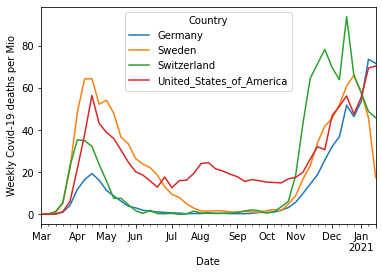

In [7]:
# Plot
ax = df.plot()
ax.set_ylabel('Weekly Covid-19 deaths per Mio');

## All together

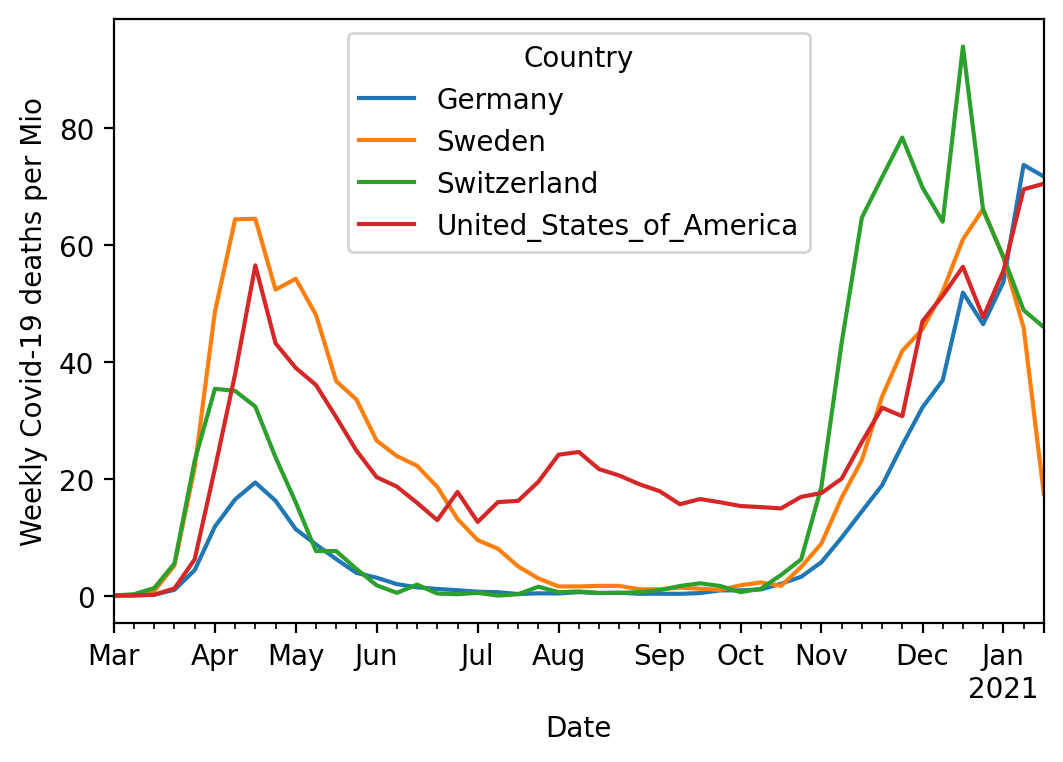

In [11]:
import pandas as pd

# Source and countries
url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
countries = ["Switzerland", "United_States_of_America", 
             "Germany", "Sweden"]

# Fetch data
df0 = pd.read_csv(url)
# df0.head()

# Prepare data
df = df0.assign(
    Date=lambda x: pd.to_datetime(x["dateRep"], format="%d/%m/%Y"),
    Deaths=lambda x: x["deaths_weekly"] / x["popData2019"] * 1e6,
).rename(columns={"countriesAndTerritories": "Country"})
df = df.loc[
    (df["Country"].isin(countries)) & (df["Date"] >= "2020-03-01"),
    ["Country", "Date", "Deaths"],
]
df = df.pivot(index="Date", columns="Country")
df = df.droplevel(0, axis=1)

# Plot
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
ax = df.plot()
ax.set_ylabel('Weekly Covid-19 deaths per Mio');